# BMI table

In [2]:
# Imports
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
%matplotlib inline

Starting with 48285 records
Dropping NaNs gives 41982 users
Dropping duplicate healthcodes gives 23448 users
Dropping invalid weights (10 > w or w > 1000 pounds) gives 21127 users
Dropping invalid weights (36 inches (3ft) > h or h > 96 inches (8ft)) gives 21042 users


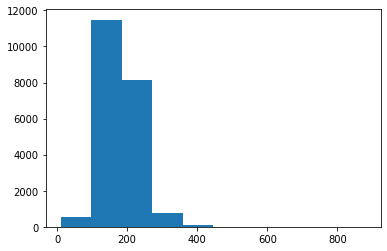

(array([6.0000e+00, 6.0000e+00, 1.1000e+01, 3.2500e+02, 4.9990e+03,
        1.2178e+04, 3.3720e+03, 1.2000e+02, 1.7000e+01, 8.0000e+00]),
 array([38. , 43.7, 49.4, 55.1, 60.8, 66.5, 72.2, 77.9, 83.6, 89.3, 95. ]),
 <a list of 10 Patch objects>)

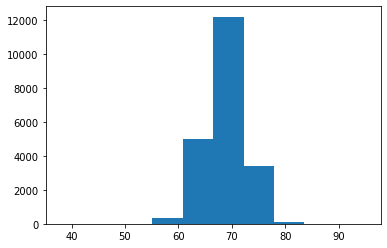

In [8]:
table_folder = "/scratch/PI/euan/projects/mhc/data/tables"
table_path = os.path.join(table_folder, 'cardiovascular-NonIdentifiableDemographicsTask-v2.tsv')

df = pd.read_csv(table_path, sep='\t')
df = df[['healthCode', 
         'NonIdentifiableDemographics.json.patientWeightPounds',
         'NonIdentifiableDemographics.json.patientHeightInches', 
         'NonIdentifiableDemographics.patientWeightPounds',
         'NonIdentifiableDemographics.patientHeightInches',]]
         #'NonIdentifiableDemographics.json.patientWakeUpTime',
         #'NonIdentifiableDemographics.json.patientCurrentAge', 
         #'NonIdentifiableDemographics.json.patientGoSleepTime']]

print(f"Starting with {df.shape[0]} records")

#Merge weights and heights
df['Weight'] = df['NonIdentifiableDemographics.patientWeightPounds'].fillna(df['NonIdentifiableDemographics.json.patientWeightPounds'])
df['Height'] = df['NonIdentifiableDemographics.patientHeightInches'].fillna(df['NonIdentifiableDemographics.json.patientHeightInches'])
df = df[['healthCode', 'Weight', 'Height']]
            
df = df.dropna()
print(f"Dropping NaNs gives {df.shape[0]} users")

#Drop duplicates
df = df.set_index('healthCode')
df = df.loc[~df.index.duplicated(keep='last')]
print(f"Dropping duplicate healthcodes gives {df.shape[0]} users")


df = df[df['Weight'] < 1000]
df = df[df['Weight'] > 10]
print(f"Dropping invalid weights (10 > w or w > 1000 pounds) gives {df.shape[0]} users")

df = df[df['Height'] < 96]
df = df[df['Height'] > 36]
print(f"Dropping invalid weights (36 inches (3ft) > h or h > 96 inches (8ft)) gives {df.shape[0]} users")


plt.hist(df['Weight'])
plt.show()
plt.hist(df['Height'])

# Make a function that does this

In [ ]:
def get_BMI_hcs():
    table_folder = "/scratch/PI/euan/projects/mhc/data/tables"
    table_path = os.path.join(table_folder, 'cardiovascular-NonIdentifiableDemographicsTask-v2.tsv')

    df = pd.read_csv(table_path, sep='\t')
    df = df[['healthCode', 
             'NonIdentifiableDemographics.json.patientWeightPounds',
             'NonIdentifiableDemographics.json.patientHeightInches', 
             'NonIdentifiableDemographics.patientWeightPounds',
             'NonIdentifiableDemographics.patientHeightInches',]]
             #'NonIdentifiableDemographics.json.patientWakeUpTime',
             #'NonIdentifiableDemographics.json.patientCurrentAge', 
             #'NonIdentifiableDemographics.json.patientGoSleepTime']]

    print(f"Starting with {df.shape[0]} records")

    #Merge weights and heights
    df['Weight'] = df['NonIdentifiableDemographics.patientWeightPounds'].fillna(df['NonIdentifiableDemographics.json.patientWeightPounds'])
    df['Height'] = df['NonIdentifiableDemographics.patientHeightInches'].fillna(df['NonIdentifiableDemographics.json.patientHeightInches'])
    df = df[['healthCode', 'Weight', 'Height']]

    df = df.dropna()
    print(f"Dropping NaNs gives {df.shape[0]} users")

    #Drop duplicates
    df = df.set_index('healthCode')
    df = df.loc[~df.index.duplicated(keep='last')]
    print(f"Dropping duplicate healthcodes gives {df.shape[0]} users")


    df = df[df['Weight'] < 1000]
    df = df[df['Weight'] > 10]
    print(f"Dropping invalid weights (10 > w or w > 1000 pounds) gives {df.shape[0]} users")

    df = df[df['Height'] < 96]
    df = df[df['Height'] > 36]
    print(f"Dropping invalid weights (36 inches (3ft) > h or h > 96 inches (8ft)) gives {df.shape[0]} users")
    
    #Calculate BMI like so
    # df['BMI'] = 703*(df['Weight'] / df['Height']) / df['Height']


    return list(df.index)